In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ratings = pd.read_csv("animelists_cleaned.csv")

In [3]:
len(ratings)

31284030

In [4]:
ratings[:10]

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,2013-03-03 10:52:53,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:54:51,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-04-27 16:43:35,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-03 10:53:57,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,2013-03-27 15:59:13,NaN
5,karthiga,210,161,0000-00-00,0000-00-00,7,2,NaN,0,2013-03-10 13:57:06,NaN
6,karthiga,232,70,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-09 17:24:42,NaN
7,karthiga,233,78,0000-00-00,0000-00-00,6,2,NaN,0,2013-03-10 05:29:44,NaN
8,karthiga,249,167,0000-00-00,0000-00-00,8,2,NaN,0,2013-03-19 16:04:46,NaN
9,karthiga,269,366,0000-00-00,0000-00-00,10,2,NaN,0,2013-03-03 09:39:23,NaN


### Time

In [6]:
ratings["my_start_date"].value_counts()[:10]

0000-00-00    26420926
2008-00-00       12156
2009-00-00       10533
2007-00-00       10425
2010-00-00        9304
2011-00-00        8909
2012-00-00        8826
2015-04-05        8200
2015-10-04        8087
2013-00-00        8003
Name: my_start_date, dtype: int64

In [7]:
ratings["my_finish_date"].value_counts()[:10]

0000-00-00    25391706
2015-03-29       11058
2015-09-27       10445
2015-09-26       10439
2016-03-27       10334
2008-00-00       10266
2015-03-28        9863
2016-03-26        9588
2016-03-28        9444
2013-09-29        9434
Name: my_finish_date, dtype: int64

In [8]:
#ratings["my_last_updated"] = ratings["my_last_updated"].map(lambda x : pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S"))

One user only rates an anime for once

In [9]:
each_rate = ratings.groupby(["username", "anime_id"]).size()

In [10]:
sorted(each_rate)[-5:]

[1, 1, 1, 1, 1]

### Status

In [11]:
ratings["my_status"].value_counts()

2     19946276
6      7362297
1      1558384
4      1230250
3      1186648
0          167
5            4
33           3
55           1
Name: my_status, dtype: int64

In [12]:
type(ratings["my_status"][0])

numpy.int64

/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


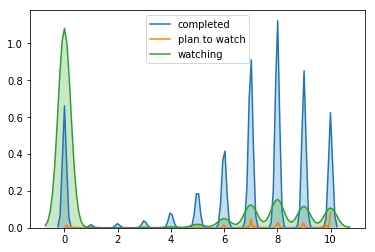

In [13]:
pp = sns.kdeplot(ratings[ratings["my_status"] == 2]["my_score"], shade = True, label = "completed")
pp = sns.kdeplot(ratings[ratings["my_status"] == 6]["my_score"], shade = True, label = "plan to watch")
pp = sns.kdeplot(ratings[ratings["my_status"] == 1]["my_score"], shade = True, label = "watching")

/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


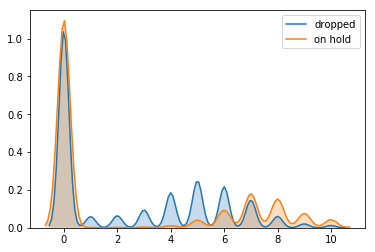

In [14]:
pp = sns.kdeplot(ratings[ratings["my_status"] == 4]["my_score"], shade = True, label = "dropped")
pp = sns.kdeplot(ratings[ratings["my_status"] == 3]["my_score"], shade = True, label = "on hold")

### Users
how many ratings did they give

In [15]:
ratings["username"].value_counts()[:10]

Exxorn             6536
uemmega            6367
JakCooper2         5923
DeadlyKizuna       5912
KanaenuYume        5234
NightTerror        5151
DesireDestiny      5062
Cafer              4777
Dragonflyk         4632
Virali             4524
canc               4520
AngelShiva         4450
giannis85          4438
bobodobo89         4404
link9us            4403
coty9090           4221
Fire-Dragon        4204
Shioxus            4152
chaos63            4130
Darkvoid           3976
LastPrinny         3889
Boogy444           3885
Yvonnelim99        3806
greatvillage       3797
_thiagobrisolla    3793
EZSPECIAL          3741
aya_lita           3703
dumnorix98         3655
axios1331          3635
DarAR92            3611
                   ... 
Cinko2                1
rajlokkhi             1
adityacmx             1
empew2                1
taijinru              1
shainaley0524         1
jssbarbie9            1
OnemissingtwO         1
Leeah-Murphy          1
serena77980           1
cham            

In [17]:
np.mean(ratings["username"].value_counts())

287.7755015684074

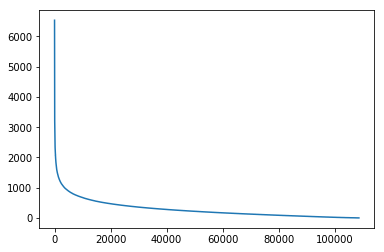

In [32]:
user_rate_times = pd.Series(ratings["username"].value_counts())
user_rate_times.reset_index(drop = True).plot()

In [51]:
First_10000 = user_rate_times[0:10000]
Next_20000 = user_rate_times[10000: 30000 ]
Rest = user_rate_times[30000: ]

In [50]:
First_1000.index[:1]

Index(['Exxorn'], dtype='object')

In [56]:
print("Number of ratings by First 10000 raters" ,len(ratings[ratings["username"].isin(First_10000.index)]["my_score"]))
print("Number of ratings by Second 20000 raters" ,len(ratings[ratings["username"].isin(Next_20000.index)]))
print("Number of ratings by Rest raters" ,len(ratings[ratings["username"].isin(Rest.index)]))

Number of ratings by First 10000 raters 10273855
Number of ratings by Second 20000 raters 9684883
Number of ratings by Rest raters 11325049


/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


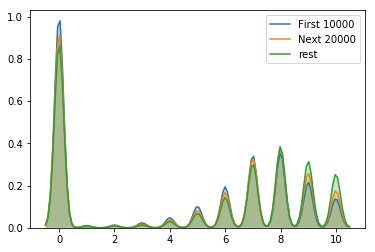

In [52]:
pp = sns.kdeplot(ratings[ratings["username"].isin(First_10000.index)]["my_score"], shade = True, label = "First 10000")
pp = sns.kdeplot(ratings[ratings["username"].isin(Next_20000.index)]["my_score"], shade = True, label = "Next 20000")
pp = sns.kdeplot(ratings[ratings["username"].isin(Rest.index)]["my_score"], shade = True, label = "rest")

Users that rate a lot tend to give lower scores

### Anime
How many ratings did each anime received

In [18]:
ratings["anime_id"].value_counts()[:10]

1535     81332
1575     67721
226      64486
5114     63649
4224     63278
20       63231
11757    62508
16498    62328
6547     61961
269      60787
2167     59752
121      58202
849      56787
9253     56664
3588     56465
6746     56067
2001     55733
2904     55592
199      54320
5081     54097
10620    54063
8074     52985
1735     51139
6702     50687
9919     50509
30       49886
11111    48995
2025     48966
1        48607
5680     47743
         ...  
33480        4
33916        4
33913        4
36349        4
34831        4
37802        3
35350        3
36551        3
36315        3
37180        3
36581        3
34037        3
33945        3
37018        3
35229        3
36550        3
37888        2
36233        2
37895        2
37896        2
33753        2
33484        2
37255        2
34187        2
34201        2
36748        2
37620        2
37493        1
36818        1
37494        1
Name: anime_id, Length: 6668, dtype: int64

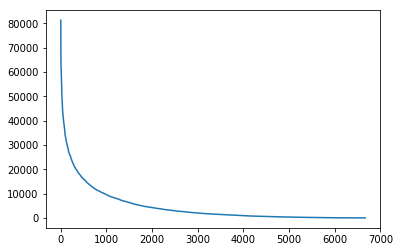

In [57]:
anime_rated_times = pd.Series(ratings["anime_id"].value_counts())
anime_rated_times.reset_index(drop = True).plot()

#pd.Series(ratings["anime_id"].value_counts().values).plot()

In [58]:
First_1000_anime = anime_rated_times[0:1000]
Next_2000_anime = anime_rated_times[1000: 3000 ]
Rest_anime = anime_rated_times[3000: ]

In [60]:
print("Number of ratings by First 1000 anime" ,len(ratings[ratings["anime_id"].isin(First_1000_anime.index)]))
print("Number of ratings by Second 2000 anime" ,len(ratings[ratings["anime_id"].isin(Next_2000_anime.index)]))
print("Number of ratings by Rest anime" ,len(ratings[ratings["anime_id"].isin(Rest_anime.index)]))

Number of ratings by First 1000 anime 19571512
Number of ratings by Second 2000 anime 9482375
Number of ratings by Rest anime 2230143


/Users/chunhsiangchang/anaconda2/envs/Python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


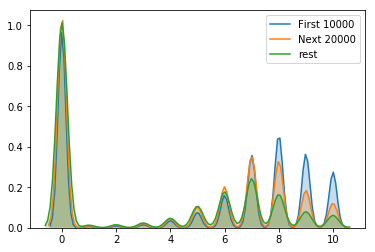

In [61]:
pp = sns.kdeplot(ratings[ratings["anime_id"].isin(First_1000_anime.index)]["my_score"], shade = True, label = "First 10000")
pp = sns.kdeplot(ratings[ratings["anime_id"].isin(Next_2000_anime.index)]["my_score"], shade = True, label = "Next 20000")
pp = sns.kdeplot(ratings[ratings["anime_id"].isin(Rest_anime.index)]["my_score"], shade = True, label = "rest")

Movices watched more common are rated higher

### How many rewatches are there?

In [21]:
re_watch = ratings["my_rewatching"].dropna()
print(len(re_watch[re_watch == 1]), "rewatches over", len(re_watch))
print( 100 * len(re_watch[re_watch == 1])/len(re_watch), "percent" )

19288 rewatches over 24405783
0.07903044946355542 percent


### Does rewatches correlate to scores?

In [22]:
re_watch_ep = ratings["my_rewatching_ep"].dropna()

In [23]:
len(re_watch_ep[re_watch_ep < 50])

31283674

In [24]:
used_id = re_watch_ep[re_watch_ep < 50].index

In [25]:
np.corrcoef(ratings["my_rewatching_ep"].iloc[used_id], ratings["my_score"][used_id] )

array([[1.        , 0.00905126],
       [0.00905126, 1.        ]])

### Explote Tagging percent

In [26]:
print("There are",len(ratings["my_tags"].dropna()), "of tags over", len(ratings), "ratings")
print(100 * len(ratings["my_tags"].dropna())/len(ratings), "percent" )

There are 1993717 of tags over 31284030 ratings
6.372954507459557 percent
